In [6]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import unicodedata
from census import Census
from us import states



# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [155]:
# Census API Key
c = Census("85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98", year=2013)

# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B01001_001E","B19013_001E","B02001_002E",
                                      "B02001_003E",
                                      "B02001_004E",
                                      "B02001_005E",
                                      "B02001_007E","B02001_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for':  'county:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B02001_001E": "Race",
                                      "B02001_002E": "White alone race",
                                      "B02001_003E": "Black or African American alone",
                                      "B02001_004E": "American Indian and Alaska Native alone",
                                      "B02001_005E": "Asian alone",
                                      "B02001_007E": "Some other race alone",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", 
                                      "B01001_001E":"ZIP_Code",
                                      "state": "State",
                                      "county": "county"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "ZIP_Code","Population", "Race","White alone race","Black or African American alone", "American Indian and Alaska Native alone","Asian alone","Some other race alone","Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]
# census_pd=census_pd[[census_pd['State']=='06']]
census_pd=census_pd[census_pd['State']=='06']
census_pd.head(67)

,State,Name,ZIP_Code,Population,Race,White alone race,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Some other race alone,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
186,06,"Alameda County, California",1535248.0,1535248.0,1535248.0,700110.0,185467.0,8919.0,411240.0,126742.0,36.8,72112.0,35763.0,188501.0,12.278212,5.494487
187,06,"Alpine County, California",1165.0,1165.0,1165.0,848.0,7.0,204.0,17.0,34.0,44.3,58636.0,25527.0,184.0,15.793991,4.377682
188,06,"Amador County, California",37422.0,37422.0,37422.0,32766.0,923.0,700.0,524.0,1201.0,49.1,53684.0,27347.0,4150.0,11.089733,6.803485
189,06,"Butte County, California",220542.0,220542.0,220542.0,185351.0,2963.0,2353.0,9501.0,6236.0,37.0,43752.0,23787.0,43942.0,19.924550,6.508057
190,06,"Calaveras County, California",45147.0,45147.0,45147.0,41320.0,386.0,430.0,568.0,696.0,50.0,55295.0,29329.0,4849.0,10.740470,5.109974
191,06,"Colusa County, California",21366.0,21366.0,21366.0,16642.0,193.0,200.0,245.0,3084.0,33.9,52158.0,21579.0,2635.0,12.332678,6.187401
192,06,"Contra Costa County, California",1065794.0,1065794.0,1065794.0,672957.0,97061.0,5420.0,156751.0,71307.0,38.6,78756.0,38219.0,111173.0,10.431003,5.321854
193,06,"Del Norte County, California",28357.0,28357.0,28357.0,21356.0,908.0,1316.0,709.0,1547.0,39.1,37909.0,19072.0,5406.0,19.064076,4.471559
194,06,"El Dorado County, California",180982.0,180982.0,180982.0,158210.0,1705.0,1846.0,6442.0,6289.0,44.1,69297.0,34884.0,16206.0,8.954482,6.094529
195,06,"Fresno County, California",939605.0,939605.0,939605.0,560516.0,47790.0,9678.0,90310.0,191631.0,30.9,45563.0,20208.0,239584.0,25.498374,6.562651


In [151]:
census_pd.shape

(58, 16)

(0, 200000)

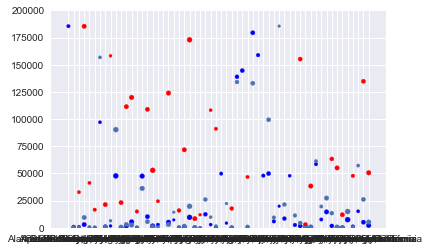

In [166]:
fig,ax=plt.subplots()

ax.scatter(census_pd['Name'],census_pd['White alone race'],c='r',s=census_pd['Poverty Rate'])
ax.scatter(census_pd['Name'],census_pd['Black or African American alone'],c='b',s=census_pd['Poverty Rate'])
ax.scatter(census_pd['Name'],census_pd['Asian alone'],s=census_pd['Poverty Rate'])
plt.ylim(0,200000)




In [150]:
%matplotlib inline
census_pd.describe().hist



<bound method hist_frame of            ZIP_Code    Population          Race  White alone race  \
count  5.800000e+01  5.800000e+01  5.800000e+01      5.800000e+01   
mean   6.492962e+05  6.492962e+05  6.492962e+05      4.046063e+05   
std    1.430013e+06  1.430013e+06  1.430013e+06      7.962260e+05   
min    1.165000e+03  1.165000e+03  1.165000e+03      8.480000e+02   
25%    4.754225e+04  4.754225e+04  4.754225e+04      4.268300e+04   
50%    1.794740e+05  1.794740e+05  1.794740e+05      1.449715e+05   
75%    6.494630e+05  6.494630e+05  6.494630e+05      4.046028e+05   
max    9.893481e+06  9.893481e+06  9.893481e+06      5.277461e+06   

       Black or African American alone  \
count                        58.000000   
mean                      38885.724138   
std                      116043.793206   
min                           7.000000   
25%                         660.500000   
50%                        3640.000000   
75%                       18709.250000   
max           

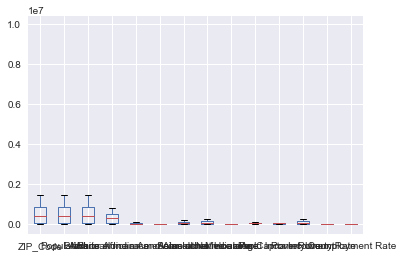

In [148]:
census_pd.describe().boxplot()
# plt.ylim(0,0.000000000002)

In [128]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [21]:
city_data=pd.read_csv('tweets_with_scores.csv')

In [22]:
city_data.head()

,Unnamed: 0,City,tweet_created_at,hashtags,text,screen_name,user_id,user_created_at,user_friends_count,user_statuses_count,tweet_id,compound,neg,pos,neu
0,0,Ojai,Wed Dec 20 02:00:13 +0000 2017,[],How big is the California Thomas fire? Check o...,NJFSAB,269846808,Mon Mar 21 15:13:54 +0000 2011,114,740,943299970026876928,-0.3400,0.156,0.0,0.844
1,1,Ojai,Wed Dec 20 01:58:45 +0000 2017,"[{'text': 'LALATE', 'indices': [2, 9]}, {'text...",🔥 #LALATE 🔥 #BREAKINGNEWS\n#THOMASFIRE \n* BRA...,LALATEWEATHER,771826726318051328,Fri Sep 02 21:46:46 +0000 2016,7,1278,943299601703960576,0.0000,0.000,0.0,1.000
2,2,Ojai,Wed Dec 20 01:58:45 +0000 2017,"[{'text': 'LALATE', 'indices': [2, 9]}, {'text...",🔥 #LALATE 🔥 #BREAKINGNEWS\n#THOMASFIRE \n* BRA...,LALATE,43846520,Mon Jun 01 07:05:19 +0000 2009,2321,202574,943299600240189441,0.0000,0.000,0.0,1.000
3,3,Ojai,Wed Dec 20 01:57:41 +0000 2017,[],RT @businessinsider: Wildfire evacuees in Sout...,msmithobx,216603871,Wed Nov 17 06:12:28 +0000 2010,2374,78431,943299334715707399,-0.7717,0.312,0.0,0.688
4,4,Ojai,Wed Dec 20 01:57:34 +0000 2017,"[{'text': 'LALATE', 'indices': [2, 9]}, {'text...",🔥 #LALATE 🔥 #BREAKINGNEWS\n#THOMASFIRE \n* BRA...,LALATEWEATHER,771826726318051328,Fri Sep 02 21:46:46 +0000 2016,7,1278,943299304634040320,0.0000,0.000,0.0,1.000


In [15]:
# recent tweets each time
for tweet in city_data.iterrows(): # disects each tweet and pulls necessary info
    text = unicode(tweet['text']) #tweet text
    date = tweet['tweet_created_at'] #time created
    convert_date = datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y") #converts date to sortable time
    user = tweet['user']['screen_name'] #SN of user
    end_id = tweet['tweet_id'] # gets id of tweet to be used in loop for next 20 results
    scores = analyzer.polarity_scores(text) # scores the text in tweet using VADER
#             news_dict['Screen Name'].append(user) # adds SN to dict
    news_dict['Tweet'].append(text) # adds tweet text to dict
    news_dict['Date'].append(convert_date) # adds converted date to dict
#             news_dict['Compound Score'].append(scores['compound']) 
#             news_dict['Positive Score'].append(scores['pos'])
#             news_dict['Negative Score'].append(scores['neg'])
#             news_dict['Neutral Score'].append(scores['neu'])
#             news_dict['Tweets Ago'].append(tweets_ago)
    tweets_ago += 1 # sets tweets ago count for next record

NameError: name 'unicode' is not defined

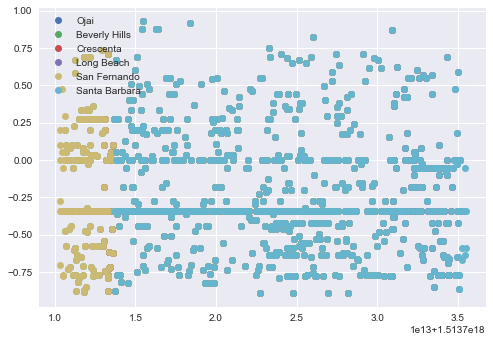

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df=pd.read_csv('tweets_with_scores.csv')

def add_converted_time(df):
    time=[]
    for raw_time in df['tweet_created_at']:
        converted_time=datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        time.append(converted_time)
    df['converted_time']=time
    df.sort_values(by=['converted_time'], inplace=True)
    return df

df=add_converted_time(df)

df_Ojai=df.loc[df['City']=='Ojai',:]
df_BH=df.loc[df['City']=='Beverly Hills',:]
df_Cre=df.loc[df['City']=='Crescenta',:]
df_LB=df.loc[df['City']=='Long_Beach',:]
df_SF=df.loc[df['City']=='San Fernando',:]
df_SB=df.loc[df['City']=='Santa Barbara',:]


city=['Ojai','Beverly Hills','Crescenta','Long Beach','San Fernando',
      'Santa Barbara']
values=[df_Ojai['compound'],df_BH['compound'],df_Cre['compound'],
        df_LB['compound'],df_SF['compound'],df_SB['compound']]

'''
fig,ax=plt.subplots()
ax.boxplot(values,labels=city)
ax.set_xticklabels(city, rotation=90)
'''

fig,ax=plt.subplots()
for i in range(6):
    dfi=df.loc[df['City']==city[i],:]
    ax.plot(dfi['converted_time'],dfi['compound'],'o',label=city[i])



ax.legend()
plt.show()
